In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv("/content/f2 (1).csv")

In [69]:
data

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-10
548,12,95,42,Sandy,orange,11,14,5,10-10-10
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10


In [70]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [72]:
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [73]:
#checking unique values
data.nunique()

,0
Temparature,21
Humidity,34
Moisture,41
Soil_Type,5
Crop_Type,17
Nitrogen,47
Potassium,31
Phosphorous,36
Fertilizer,14


In [74]:
#checking for null values
data.isna().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil_Type,0
Crop_Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer,0


In [75]:
data['Fertilizer'].unique() ## we have 14 types of different fertilizers

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [76]:
data['Crop_Type'].unique() ## 17 different crop types

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [77]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


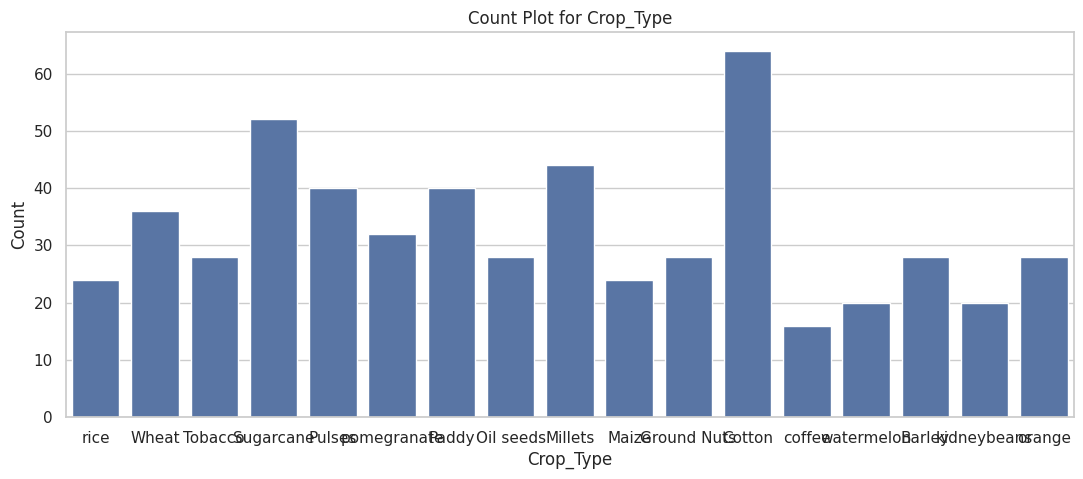

In [78]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

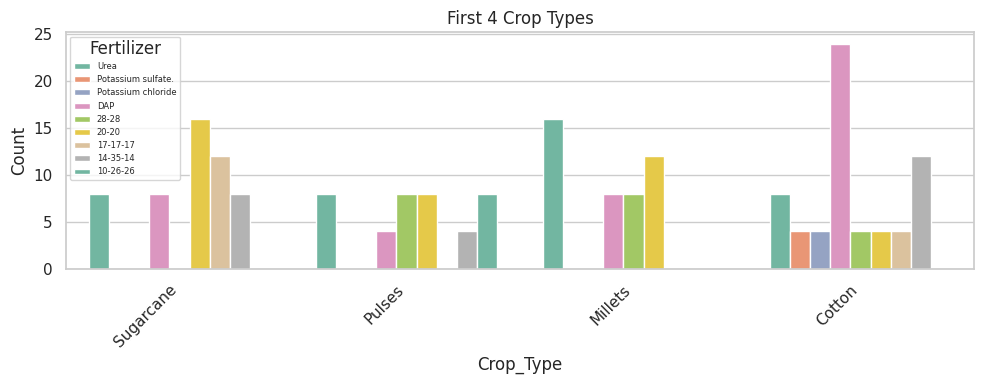

In [79]:
#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer',prop={'size': 6})
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

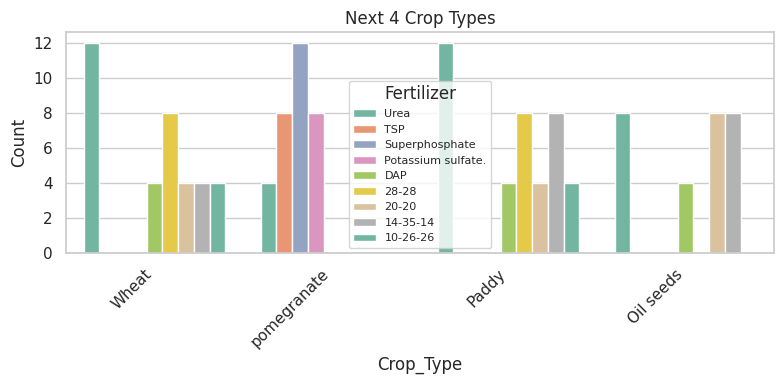

In [80]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer',prop={'size': 8})
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

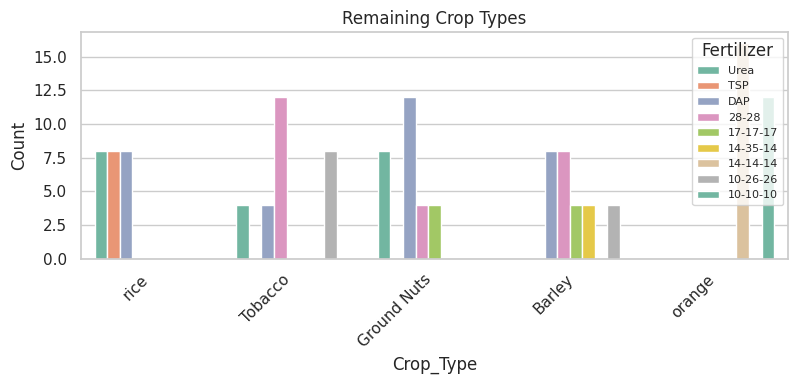

In [81]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer',prop={'size': 8})
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [82]:
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [83]:
#  Label Encoding
encode_soil = LabelEncoder()
encode_crop = LabelEncoder()
encode_ferti = LabelEncoder()

In [84]:
data['Soil_Type'] = encode_soil.fit_transform(data['Soil_Type'])
data['Crop_Type'] = encode_crop.fit_transform(data['Crop_Type'])
data['Fertilizer'] = encode_ferti.fit_transform(data['Fertilizer'])

In [85]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump({'soil': encode_soil, 'crop': encode_crop, 'fertilizer': encode_ferti}, f)

In [86]:
#  Feature Engineering
data['Soil_Moisture_Ratio'] = data['Moisture'] / data['Humidity']
data['Total_Nutrients'] = data['Nitrogen'] + data['Phosphorous'] + data['Potassium']
data['Temp_Humidity_Index'] = data['Temparature'] * data['Humidity']
data['Nutrient_Imbalance'] = data[['Nitrogen', 'Phosphorous', 'Potassium']].std(axis=1)

In [87]:
#  Crop-Specific Nutrient Ratios: Automatically populated using crop averages
crop_nutrient_ratios = {}


In [88]:
# Loop through each unique crop type in the dataset
for crop in data['Crop_Type'].unique():
    # Filter the data for the current crop
    crop_data = data[data['Crop_Type'] == crop]

    # Calculate the average values for Nitrogen, Phosphorous, and Potassium
    avg_nitrogen = crop_data['Nitrogen'].mean()
    avg_phosphorous = crop_data['Phosphorous'].mean()
    avg_potassium = crop_data['Potassium'].mean()

    # Scale the average values to create nutrient ratios (this is an example; you may adjust)
    total_nutrients = avg_nitrogen + avg_phosphorous + avg_potassium
    nutrient_ratios = {
        'Nitrogen': avg_nitrogen / total_nutrients,
        'Phosphorous': avg_phosphorous / total_nutrients,
        'Potassium': avg_potassium / total_nutrients
    }

    # Add the nutrient ratios to the dictionary
    crop_nutrient_ratios[crop] = nutrient_ratios

In [89]:
# Print the generated nutrient ratios for each crop
print("Generated Crop-Specific Nutrient Ratios:")
for crop, ratios in crop_nutrient_ratios.items():
    print(f"{crop}: {ratios}")

Generated Crop-Specific Nutrient Ratios:
15: {'Nitrogen': np.float64(0.48197734294541705), 'Phosphorous': np.float64(0.22245108135942326), 'Potassium': np.float64(0.2955715756951596)}
10: {'Nitrogen': np.float64(0.5737704918032787), 'Phosphorous': np.float64(0.3551912568306011), 'Potassium': np.float64(0.07103825136612023)}
9: {'Nitrogen': np.float64(0.44224422442244227), 'Phosphorous': np.float64(0.44554455445544555), 'Potassium': np.float64(0.11221122112211221)}
8: {'Nitrogen': np.float64(0.40084388185654), 'Phosphorous': np.float64(0.4831223628691983), 'Potassium': np.float64(0.11603375527426159)}
7: {'Nitrogen': np.float64(0.4588528678304239), 'Phosphorous': np.float64(0.4364089775561097), 'Potassium': np.float64(0.10473815461346633)}
14: {'Nitrogen': np.float64(0.19798657718120805), 'Phosphorous': np.float64(0.5100671140939598), 'Potassium': np.float64(0.29194630872483224)}
6: {'Nitrogen': np.float64(0.5098039215686274), 'Phosphorous': np.float64(0.3995098039215686), 'Potassium': 

In [90]:
#  Define X and y
X = data.drop('Fertilizer', axis=1)
y = data['Fertilizer']

In [91]:
#  Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
#  Normalize data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
#  Define models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='poly', degree=3, C=1),
    'Logistic Regression': LogisticRegression(random_state=2),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=0)
}

In [94]:
# Store metrics and trained models
acc_test = []
acc_train = []
model_names = []
model_objects = {}

In [95]:
#  Train & Evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    model_objects[name] = model

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    acc_test.append(accuracy_score(y_test, y_pred_test))
    acc_train.append(accuracy_score(y_train, y_pred_train))
    model_names.append(name)

    print(f"\n Model: {name}")
    print(" Test Accuracy:", round(acc_test[-1], 2))
    print(" Train Accuracy:", round(acc_train[-1], 2))
    print(" Classification Report:\n", classification_report(y_test, y_pred_test))


 Model: Decision Tree
 Test Accuracy: 0.93
 Train Accuracy: 0.95
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00        10
           2       0.20      1.00      0.33         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.93      0.88      0.90        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.78      1.00      0.88         7
          13       0.94      0.94      0.94        18

    accuracy                           0.93       111
   macro avg       0.85      0.89      0.85

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<ipython-input-96-3e8941f7f25e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_test, y=model_names, palette='Set2')


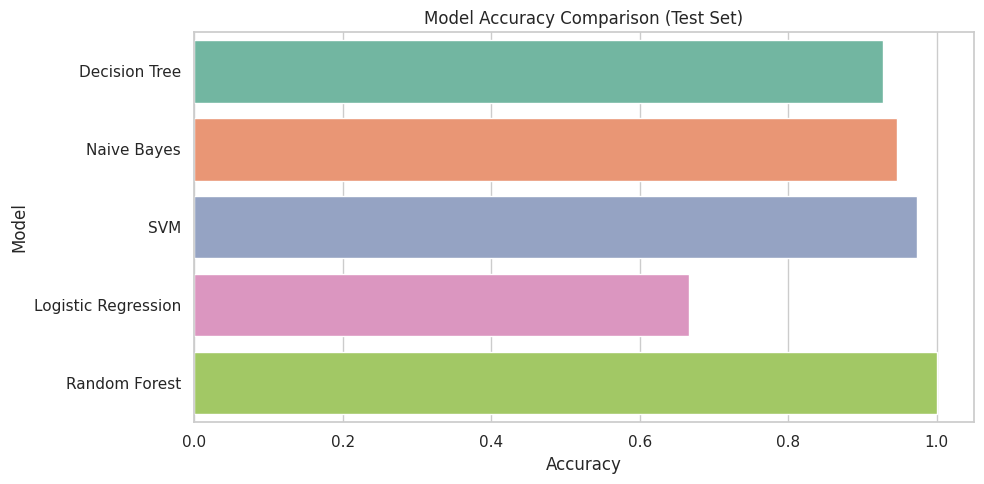

In [96]:
#  Accuracy Plot
plt.figure(figsize=[10, 5], dpi=100)
sns.barplot(x=acc_test, y=model_names, palette='Set2')
plt.title('Model Accuracy Comparison (Test Set)')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

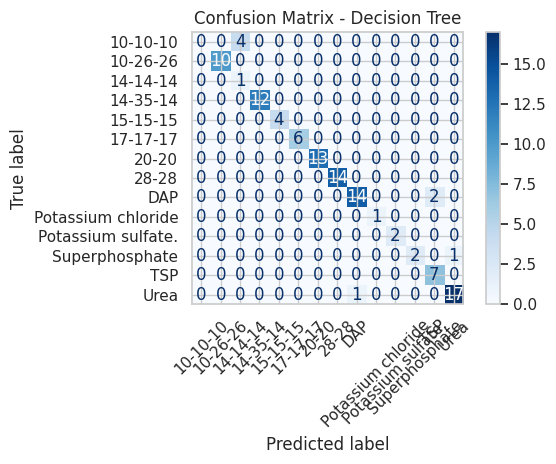

<Figure size 800x600 with 0 Axes>

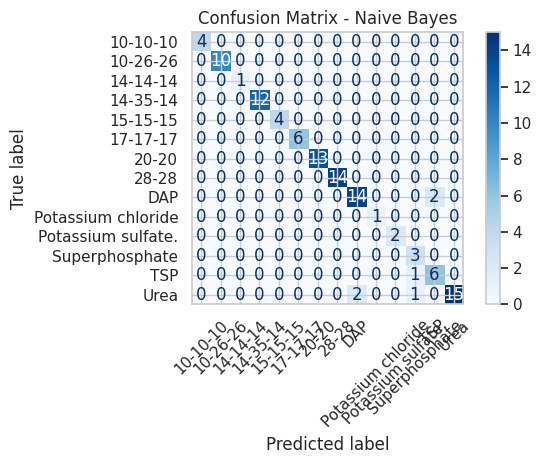

<Figure size 800x600 with 0 Axes>

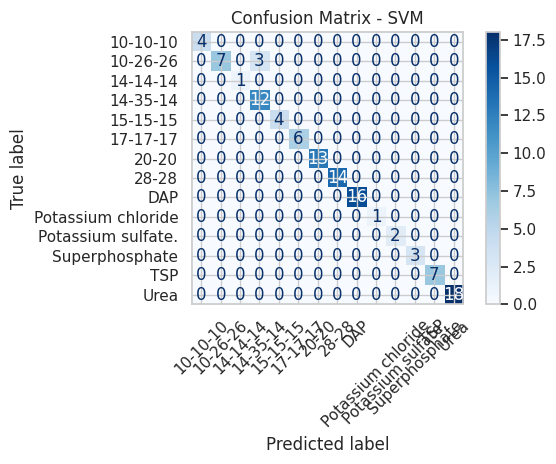

<Figure size 800x600 with 0 Axes>

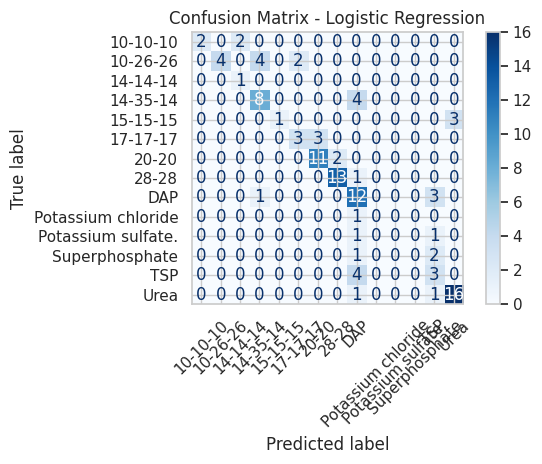

<Figure size 800x600 with 0 Axes>

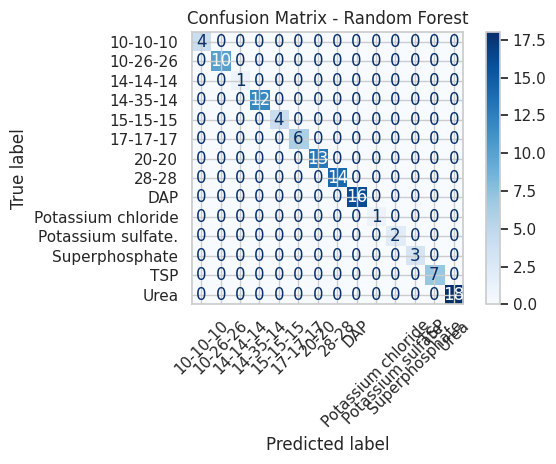

In [97]:
#  Confusion Matrix for All Models
for name, model in model_objects.items():
    y_pred = model.predict(x_test)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred),
        display_labels=encode_ferti.classes_
    ).plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Focused Confusion Matrix: Random Forest


<Figure size 800x600 with 0 Axes>

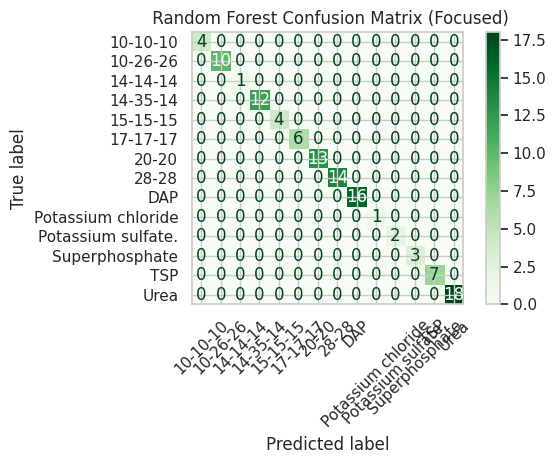

In [98]:
# Focused Confusion Matrix for Random Forest
print("\n Focused Confusion Matrix: Random Forest")
rf_model = model_objects['Random Forest']
y_pred_rf = rf_model.predict(x_test)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_rf),
    display_labels=encode_ferti.classes_
).plot(cmap='Greens', values_format='d')
plt.title(' Random Forest Confusion Matrix (Focused)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
#  Save Best Model
best_index = np.argmax(acc_test)
best_model = list(model_objects.values())[best_index]
best_model_name = model_names[best_index]
print(f"\n Best Model: {best_model_name} — Accuracy: {acc_test[best_index]:.2f}")
with open('fertilizer_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


 Best Model: Random Forest — Accuracy: 1.00


In [100]:
with open('fertilizer_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)



In [101]:

# User Input Feature (Example)
print("\n Fertilizer Recommendation System")
soil_type = input("Enter Soil Type (e.g., Loamy, Sandy, Clayey): ")
crop_type = input("Enter Crop Type (e.g., Rice, Wheat, Orange, Kidneybeans): ")
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
nitrogen = int(input("Enter Nitrogen value: "))
phosphorous = int(input("Enter Phosphorous value: "))
potassium = int(input("Enter Potassium value: "))
moisture = float(input("Enter Moisture (%): "))


 Fertilizer Recommendation System
Enter Soil Type (e.g., Loamy, Sandy, Clayey): sandy
Enter Crop Type (e.g., Rice, Wheat, Orange, Kidneybeans): wheat
Enter Temperature (°C): 36
Enter Humidity (%): 28
Enter Nitrogen value: 15
Enter Phosphorous value: 67
Enter Potassium value: 34
Enter Moisture (%): 23


In [102]:
# Calculate the crop growth index (CGI)
crop_ratios = crop_nutrient_ratios.get(crop_type, {'Nitrogen': 0, 'Phosphorous': 0, 'Potassium': 0})
crop_growth_index = (crop_ratios['Nitrogen'] * nitrogen) + (crop_ratios['Phosphorous'] * phosphorous) + (crop_ratios['Potassium'] * potassium)
print(f"Crop Growth Index for {crop_type}: {crop_growth_index}")


Crop Growth Index for wheat: 0


In [103]:
# Fertilizer recommendation based on crop and nutrient values
print(f"Suggested Fertilizer for {crop_type} based on your input:")
if crop_growth_index < 0.5:
    print("Recommended Fertilizer: Urea (High Nitrogen)")
elif crop_growth_index < 1.0:
    print("Recommended Fertilizer: 10-10-10 (Balanced)")
else:
    print("Recommended Fertilizer: NPK 20-20-20 (High Potassium and Phosphorous)")

Suggested Fertilizer for wheat based on your input:
Recommended Fertilizer: Urea (High Nitrogen)
